
**1.Frame the problem and look at the big picture**


Actually, the dataset contains some attributes such as age, sex, body mass index, blood pressure, and six blood serum measurements. the target attributes contain the disease progression after one year.

using the univariate linear regression method we find the relation between the independent variable body mass index(BMI) with one dependent variable (disease progression).

in this analysis, we depict the slope and interception of a linear regression model and we find how the bmi connected to deciese progresssion.apart from that,We check the model's performance by measuring the loss, that represents the difference between the predicted and actual values of disease progression, on both the training and test datasets.

In [114]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn  import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

**2.get data**

In [115]:
d_X, d_y = datasets.load_diabetes(return_X_y=True)
print("Given Attributes:")
print(d_X)
print("Target Attribute:")
print(d_y)

Given Attributes:
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
Target Attribute:
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48. 

*getshape*


In [116]:
d_X.shape

(442, 10)

In [117]:
d_y.shape



(442,)

3.EXPLORE DATA

Creating a dataframe



In [118]:
d = pd.DataFrame(d_X,columns = ["age","sex","bmi","bp","s1","s2","s3","s4","s5","s6"])
d["dis__prog"] = pd.DataFrame(d_y)
d

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,dis__prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Text(0, 0.5, 'Value')

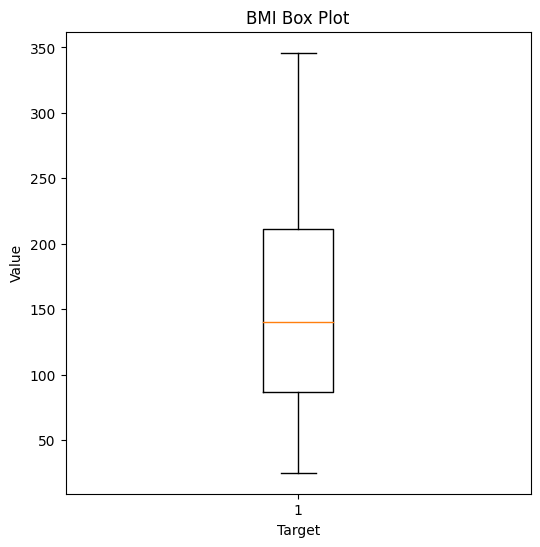

In [119]:
fig = plt.figure(figsize =(6,6))
plt.boxplot(d_y)
plt.title('BMI Box Plot')
plt.xlabel("Target")
plt.ylabel("Value")


<Axes: xlabel='bmi', ylabel='dis__prog'>

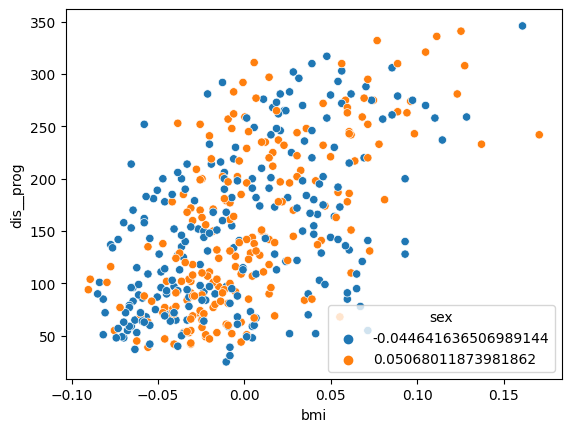

In [120]:
sns.scatterplot(data = d, x = "bmi", y = "dis__prog", hue = "sex", palette='tab10')


correlation plot

Text(0.5, 1.0, 'correlation matirx')

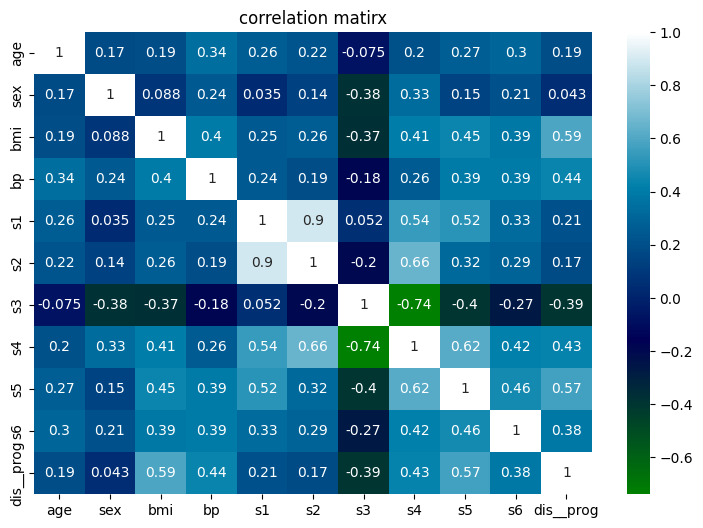

In [121]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(d.corr(), annot=True,cmap = 'ocean')
plt.title("correlation matirx")

In [122]:
X = np.array(d["bmi"]).reshape(-1,1) # X is the feature 
y = np.array(d["dis__prog"]) # y is the target array 
#y is the dependent and x is the indidpendent
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=0)



**scatter plot for train data**

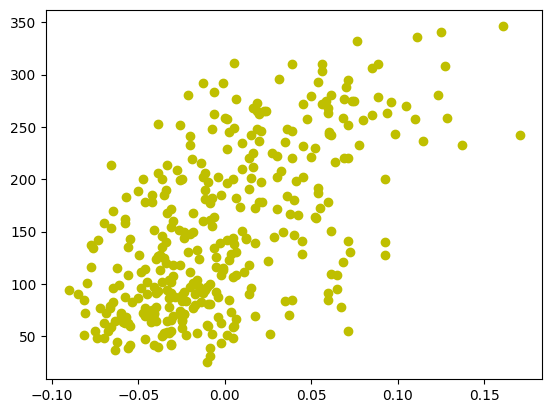

In [123]:
plt.scatter(X_train, y_train, color='y')


**scatter plot for test data**

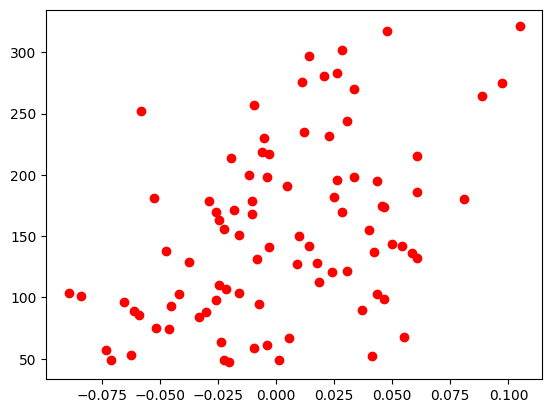

In [124]:
plt.scatter(X_test, y_test, color='red')

**loss on training and test data using mean squared error**

In [125]:
m = LinearRegression()#linear regression function
m.fit(X_train,y_train)
y_test_pred = m.predict(X_test)
y_train_pred = m.predict(X_train)
train_loss = mean_squared_error(y_train, y_train_pred)#calculating the train data loss
test_loss = mean_squared_error(y_test, y_test_pred)#calculating the test data loss

print("loss of train model: {:.2f}".format(train_loss))
print("loss of test model: {:.2f}".format(test_loss))

loss of train model: 3827.82
loss of test model: 4150.68


***6-7 modeling***

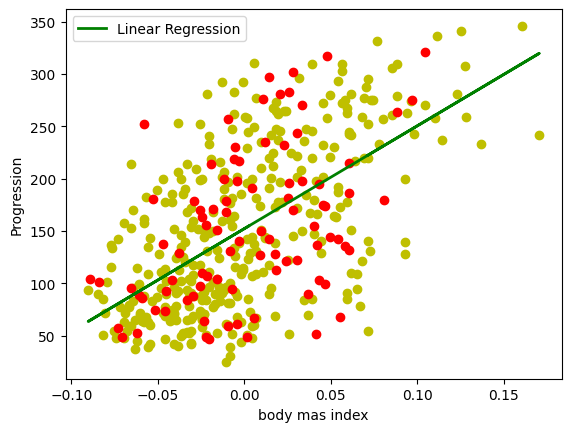

In [126]:
plt.scatter(X_train, y_train, color='y')
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, y_train_pred, color='green', linewidth=2, label='Linear Regression')
plt.xlabel('body mas index')
plt.ylabel('Progression')
plt.legend()
plt.show()


**solution**

* from this model, it seems decease progression increases slightly when the body mass index increases
* i think it looks good when it may not be the optimized one, firstly the MSI value of the test model is high than the training mode. so that there will be another dataset will be there to do this at in optimized level.else try another linear regression model wil help to ruin the hike of that MSE of test model